# <a id='toc1_'></a>[Tarea realizada por Carlos Sánchez Polo y Jesús Martínez Leal](#toc0_)
Última edición: 15/02/2024

**Table of contents**<a id='toc0_'></a>    

- [Dimension intrínseca](#toc2_)    
  - [Carga de librerías y de datasets](#toc2_1_)    
  - [Estimación de ID global](#toc2_2_)    
    - [Ejemplo spectral gap](#toc2_2_1_)    
  - [Estimación de ID local](#toc2_3_)    
  - [Ejercicios.](#toc2_4_)    
    - [Generamos conjuntos de datos del benchmark.](#toc2_4_1_)    
    - [Representación 3D de los datasets](#toc2_4_2_)    
    - [Obtención de dimensionalidad intrínseca con métodos globales y locales](#toc2_4_3_)    
    - [Obtén la dimensionalidad intrínseca del subconjunto de datos de MNIST pertenecientes al 1. ¿Qué métodos utilizarías, globales o locales? Justifica las respuestas.](#toc2_4_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Dimension intrínseca](#toc0_)

## <a id='toc2_1_'></a>[Carga de librerías y de datasets](#toc0_)

Utilizaremos la librería scikit-dimension - Intrinsic dimension estimation in Python. https://scikit-dimension.readthedocs.io/en/latest/index.html

In [1]:
import skdim
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Se generan dos conjuntos de datos que contienen clusters con diferentes dimensiones intrínsecas (ID).

In [2]:
#generate data
data1, clusters = skdim.datasets.lineDiskBall(n = 2000, random_state = 0)
data2 = skdim.datasets.swissRoll3Sph(n_swiss=4000,n_sphere=2000, h=2, random_state = 0)

#plot
fig = make_subplots(rows=1, cols=2,specs=[[{'type': 'Scatter3d'}]*2])

trace1=go.Scatter3d(dict(zip(['x','y','z'],data1.T[:3])),
       mode='markers',marker=dict(size=1.5,colorbar=dict()))
trace2=go.Scatter3d(dict(zip(['x','y','z'],data2.T[:3])),
       mode='markers',marker=dict(size=1.5,colorbar=dict()))

fig.add_traces([trace1,trace2],rows=1,cols=[1,2])
fig.layout.update(height=450, width=800)
fig.show()

## <a id='toc2_2_'></a>[Estimación de ID global](#toc0_)

### <a id='toc2_2_1_'></a>[Ejemplo spectral gap](#toc0_)

In [3]:
pca=skdim.id.lPCA(ver='maxgap')

#global ID
gid1=pca.fit(data1).dimension_
print(pca.gap_) # distancia entre pares de autovalores seguidos; Donde está el valor grande es que hay un gap
gid2=pca.fit(data2).dimension_
print(pca.gap_)
print(gid1,gid2)

[11.48990492  1.97873214]
[ 1.29356694  1.48651622 12.35287536]
1 3


In [4]:
pca=skdim.id.lPCA(ver='FO')

#global ID
gid1=pca.fit(data1).dimension_
gid2=pca.fit(data2).dimension_
print(gid1,gid2)

2 3


Para más información tenemos esto:

https://scikit-dimension.readthedocs.io/en/stable/skdim.id.lPCA.html

Version ‘FO’ (Fukunaga-Olsen) returns eigenvalues larger than alphaFO times the largest eigenvalue.

## <a id='toc2_3_'></a>[Estimación de ID local](#toc0_)

Los estimadors calculan el ID local usando k-NN en cada punto, lo que es útil para encontrar si un conjunto de datos tiene regiones con diferentes ID.

In [5]:
#local ID (pointwise estimates)
lid1=pca.fit_pw(data1,n_neighbors=25).dimension_pw_
lid2=pca.fit_pw(data2,n_neighbors=25).dimension_pw_

A cada muestra se le asigna una dimensión con lo de dimension_pw_

In [6]:
fig.update_traces({'text':lid1,'marker.color':lid1,'marker.colorbar':dict(thickness=5,x=.42)},col=1)
fig.update_traces({'text':lid2,'marker.color':lid2,'marker.colorbar':dict(thickness=5,x=.98)},col=2)
fig.show()

## <a id='toc2_4_'></a>[Ejercicios.](#toc0_)

### <a id='toc2_4_1_'></a>[Generamos conjuntos de datos del benchmark.](#toc0_)

In [7]:
benchmark = skdim.datasets.BenchmarkManifolds(random_state=0)
#dictionary with all datasets
dict_data = benchmark.generate()
#ground truth dataframe
truth = benchmark.truth
#generate a dataset with custom parameters
M1_sphere_custom = benchmark.generate(name="M1_Sphere",n=2500,dim=10,d=5) # sacamos del benchmark; esta es custom

M1_sphere = dict_data['M1_Sphere'] #np.array (n x dim)
truth

Intrinsic Dimension Number of variables  \
M1_Sphere                          10                  11   
M2_Affine_3to5                      3                   5   
M3_Nonlinear_4to6                   4                   6   
M4_Nonlinear                        4                   8   
M5a_Helix1d                         1                   3   
M5b_Helix2d                         2                   3   
M6_Nonlinear                        6                  36   
M7_Roll                             2                   3   
M8_Nonlinear                       12                  72   
M9_Affine                          20                  20   
M10a_Cubic                         10                  11   
M10b_Cubic                         17                  18   
M10c_Cubic                         24                  25   
M10d_Cubic                         70                  71   
M11_Moebius                         2                   3   
M12_Norm                           20                  20   
M13a_Scurve                         2                   3   
M13b_Spiral                         1                  13   
Mbeta                              10                  40   
Mn1_Nonlinear                      18                  72   
Mn2_Nonlinear                      24                  96   
Mp1_Paraboloid                      3                  12   
Mp2_Paraboloid                      6                  21   
Mp3_Paraboloid                      9                  30   

                                                         Description  
M1_Sphere                               10D sphere linearly embedded  
M2_Affine_3to5                                          Affine space  
M3_Nonlinear_4to6      Concentrated figure, mistakable with a 3D one  
M4_Nonlinear                                      Nonlinear manifold  
M5a_Helix1d                                                 1D helix  
M5b_Helix2d                                                 2D helix  
M6_Nonlinear                                      Nonlinear manifold  
M7_Roll                                                   Swiss Roll  
M8_Nonlinear                      Nonlinear (highly curved) manifold  
M9_Affine                                               Affine space  
M10a_Cubic                                             10D hypercube  
M10b_Cubic                                             17D hypercube  
M10c_Cubic                                             24D hypercube  
M10d_Cubic                                             70D hypercube  
M11_Moebius                            Möebius band 10-times twisted  
M12_Norm                             Isotropic multivariate Gaussian  
M13a_Scurve                                               2D S-curve  
M13b_Spiral                                           1D helix curve  
Mbeta              Manifold generated with a smooth nonuniform pd...  
Mn1_Nonlinear      Nonlinearly embedded manifold of high ID (see ...  
Mn2_Nonlinear      Nonlinearly embedded manifold of high ID (see ...  
Mp1_Paraboloid     3D paraboloid, nonlinearly embedded in (3(3+1)...  
Mp2_Paraboloid     6D paraboloid, nonlinearly embedded in (3*(6+1...  
Mp3_Paraboloid     9D paraboloid, nonlinearly embedded in (3*(9+1...

Para cada uno de los datasets siguientes (teniendo en cuenta los parámetros por defecto): 
* M5a_Helix1d
* M5b_Helix2d	
* M11_Moebius

Y los siguientes algoritmos:
* Spectral Gap
* PCA (método por defecto)
* Correlation dimension
* MADA

1. Representa los datos en 3D
2. Calcula el ID global y local con los algoritmos anteriores.
3. Construye un dataframe con el nombre del dataset, el ID estimado por cada método y el ID verdadero.
4. ¿Qué algoritmo funciona mejor en cada caso? 

### <a id='toc2_4_2_'></a>[Representación 3D de los datasets](#toc0_)

In [8]:
datasets = ['M5a_Helix1d', 'M5b_Helix2d', 'M11_Moebius']

fig = make_subplots(rows=1, cols=len(datasets), specs=[[{'type': 'scatter3d'}] * len(datasets)])

traces = []
for name in datasets:
    data = dict_data[name].T
    trace = go.Scatter3d(
        x=data[0],
        y=data[1],
        z=data[2],
        mode='markers',
        marker=dict(size=1.5, colorbar=dict()),
        text=[name] * len(data[0]),  # Aquí establecemos el nombre del dataset como el texto para cada punto
        name=name
    )
    traces.append(trace)

fig.add_traces(traces, rows=1, cols=list(range(1, len(datasets) + 1)))

fig.update_layout(height=450, width=1300, scene=dict(
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z'))

fig.show()


### <a id='toc2_4_3_'></a>[Obtención de dimensionalidad intrínseca con métodos globales y locales](#toc0_)

Los métodos locales se centran en el análisis de puntos individuales o grupos de puntos, mientras que los métodos globales consideran la estructura de los datos en su totalidad. Ambos enfoques tienen sus propias ventajas y desventajas.

In [9]:
algorithms = ['spectral gap', 'pca', 'correlation dimension', 'mada']
cbPos = [0.2, 0.48, 0.75, 1]

gids, dfDatasets, dfAlgorithms, dfTrueIds = [], [], [], []

for datasetName in datasets:

    data = dict_data[datasetName]
    trueId = truth['Intrinsic Dimension'][datasetName]

    fig = make_subplots(rows = 1, cols = len(algorithms), specs = [ [{'type': 'Scatter3d'}] * len(algorithms) ])
    traces = []

    for idx, algorithmName in enumerate(algorithms):
    
        if algorithmName == 'spectral gap':
            model = skdim.id.lPCA(ver='maxgap')
            model.fit(data)
            lids = model.fit_pw(data).dimension_pw_
        elif algorithmName == 'pca':
            model = skdim.id.lPCA()
            model.fit(data)
            lids = model.fit_pw(data).dimension_pw_
        elif algorithmName == 'correlation dimension':
            model = skdim.id.CorrInt()
            model.fit(data)
            lids = model.fit_pw(data).dimension_pw_
        elif algorithmName == 'mada':
            model = skdim.id.MADA()
            model.fit(data)
            lids = model.dimension_pw_
        else:
            raise Exception(f'Algorithm {algorithmName} not implemented')        
    
        trace = go.Scatter3d(
            dict(zip(['x', 'y', 'z'], data.T[:3])),
            mode='markers', marker=dict(size=1.5, colorbar=dict()))
        
        # Agregar el nombre del algoritmo al título del scatter
        trace.name = algorithmName
        
        fig.add_traces(trace, rows=1, cols=idx + 1)
        fig.update_traces({'text': lids, 'marker.color': lids, 'marker.colorbar': dict(thickness=5, x=cbPos[idx])}, col=idx + 1)
    
        dfDatasets.append(datasetName)
        dfAlgorithms.append(algorithmName)
        gids.append(model.dimension_)
        dfTrueIds.append(trueId)
    
    fig.layout.update(height = 450, width = 1000, title = datasetName)
    fig.show()

results = pd.DataFrame({'dataset': dfDatasets, 'algorithm': dfAlgorithms, 'gId': gids, 'trueId': dfTrueIds})

results_new = results.pivot(index='dataset', columns='algorithm', values='gId').reset_index()
results_new['trueId'] = results.groupby('dataset')['trueId'].first().values

results_new

algorithm      dataset  correlation dimension      mada  pca  spectral gap  \
0          M11_Moebius               1.568608  2.097532  3.0           2.0   
1          M5a_Helix1d               0.935967  1.084426  2.0           2.0   
2          M5b_Helix2d               2.474721  3.169177  3.0           2.0   

algorithm  trueId  
0               2  
1               1  
2               2

Para `M5a_Helix1d`, obtenemos un resultado más preciso con `Correlation Dimension`. Para `M5b_Helix2d` y `M11_Moebius`, obtenemos mejores resultados con `MADA`.

En cualquier caso, observamos que estos dos algoritmos funcionan mejor que PCA (`Spectral gap`) y `PCA` (usando la versión Fukunaga-Olsen).

### <a id='toc2_4_4_'></a>[Obtén la dimensionalidad intrínseca del subconjunto de datos de MNIST pertenecientes al 1. ¿Qué métodos utilizarías, globales o locales? Justifica las respuestas.](#toc0_)

In [10]:
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784', version=1)

X, y = mnist.data, mnist.target.astype(int)

X_1 = X[y == 1]
print(X_1.shape)

(7877, 784)


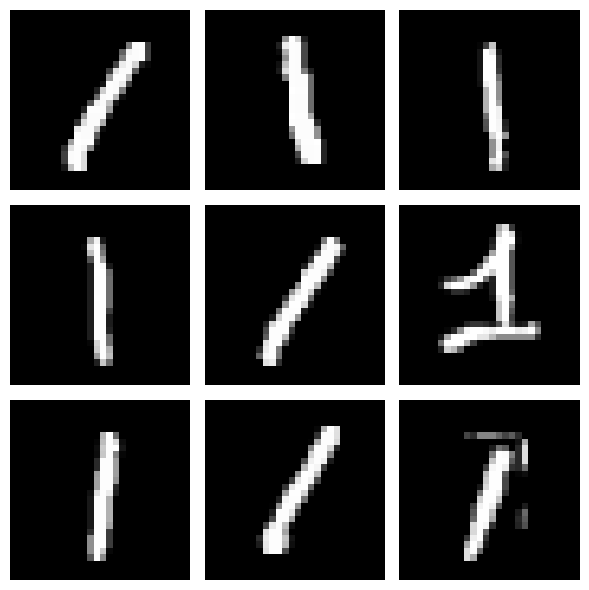

In [11]:
import matplotlib.pyplot as plt

X_1.reset_index(drop=True, inplace=True)

# num_samples hacer display
num_samples = 9

fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i in range(num_samples):
    sample_image = X_1.iloc[i].values.reshape(28, 28)
    axes[i // 3, i % 3].imshow(sample_image, cmap='gray')
    axes[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.show()

En primer lugar, obtenemos una estimación de la dimensión intrínseca usando el algoritmo de PCA.

In [12]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_1)
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
perc = 0.95
n_components_pca = np.argmax(explained_variance_ratio_cumulative >= perc) + 1 # sacamos número de componentes

maxgap = skdim.id.lPCA(ver = 'maxgap')
maxgap_id = maxgap.fit(X_1).dimension_

print("El número de componentes necesarias para explicar al menos un 90% de los datos es", n_components_pca)
print("La dimensión intrínseca estimada usando el algoritmo de PCA en su versión maxgap es", maxgap_id)

El número de componentes necesarias para explicar al menos un 90% de los datos es 71
La dimensión intrínseca estimada usando el algoritmo de PCA en su versión maxgap es 538


Calculamos con un método local de k-vecinos la dimensionalidad intrínseca, tal y como se indica en teoría.

In [13]:
from sklearn.neighbors import NearestNeighbors

# Aplicar k-NN para determinar la dimensionalidad intrínseca
n_neighbors = 5
knn = NearestNeighbors(n_neighbors = n_neighbors)
knn.fit(X_1)

# Obtener el número de vecinos necesarios para mantener la estructura de los datos
neigh_dist, neigh_ind = knn.kneighbors(X_1, return_distance=True)

knn_dim = np.mean(neigh_dist[:, 1]) / ( (np.mean(neigh_dist[:, 2]) - np.mean(neigh_dist[:, 1])) * n_neighbors )
print("La estimación de la dimensionalidad intrínseca con el método de k-vecinos es", knn_dim)

La estimación de la dimensionalidad intrínseca con el método de k-vecinos es 2.639752191739162


Ambos métodos pueden proporcionar información valiosa sobre la dimensionalidad intrínseca de los datos "1" de MNIST. 

Los métodos locales son más precisos cuando existen varios manifolds juntos. Es por eso que en este caso, quizás resulta algo más conveniente usar métodos loscales. El dígito 1 puede estar escrito de diversas maneras, dada la variabilidad en la escritura humana. Además, puede existir una variación en la digitalización presente.